<a href="https://colab.research.google.com/github/ritinshkumarshr-hub/Attandance-management-/blob/main/Employee_Salary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#####Employee_Salary_Distribution

In [29]:
pip install gradio

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import gradio as gr


In [44]:
from google.colab import files
uploaded = files.upload()


Saving employee_dataset_10000.csv to employee_dataset_10000 (3).csv


In [45]:
df = pd.read_csv('employee_dataset_10000.csv')



In [46]:
df


,EmployeeID,Name,Department,Experience_Years,Education_Level,Age,Gender,City,Monthly_Salary
0,1,Employee_1,Marketing,15,Master,53,Female,Delhi,111416
1,2,Employee_2,Operations,7,Bachelor,25,Female,Bangalore,95271
2,3,Employee_3,IT,12,High School,51,Female,Hyderabad,69064
3,4,Employee_4,Operations,8,PhD,44,Male,Delhi,95091
4,5,Employee_5,Operations,15,Master,36,Female,Delhi,132450
...,...,...,...,...,...,...,...,...,...
9995,9996,Employee_9996,IT,11,Bachelor,24,Female,Chennai,149931
9996,9997,Employee_9997,IT,5,Bachelor,31,Male,Chennai,64358
9997,9998,Employee_9998,IT,19,High School,55,Female,Chennai,193005
9998,9999,Employee_9999,Marketing,12,High School,31,Male,Bangalore,59326


In [47]:
df['Monthly_Salary'].describe()


,Monthly_Salary
count,10000.000000
mean,114895.141100
std,49283.158907
min,28420.000000
25%,72329.750000
50%,114705.000000
75%,157687.250000
max,199999.000000


In [48]:
print("Mean Salary:", df['Monthly_Salary'].mean())
print("Median Salary:", df['Monthly_Salary'].median())
print("Standard Deviation:", df['Monthly_Salary'].std())


Mean Salary: 114895.1411
Median Salary: 114705.0
Standard Deviation: 49283.158906873796


In [49]:
gender_salary = df.groupby('Gender')['Monthly_Salary'].mean()
gender_salary


,Monthly_Salary
Gender,
Female,114692.180479
Male,115089.130647


In [50]:
if len(gender_salary) == 2:
    print("Pay Gap:", gender_salary.iloc[0] - gender_salary.iloc[1])


Pay Gap: -396.95016854809364


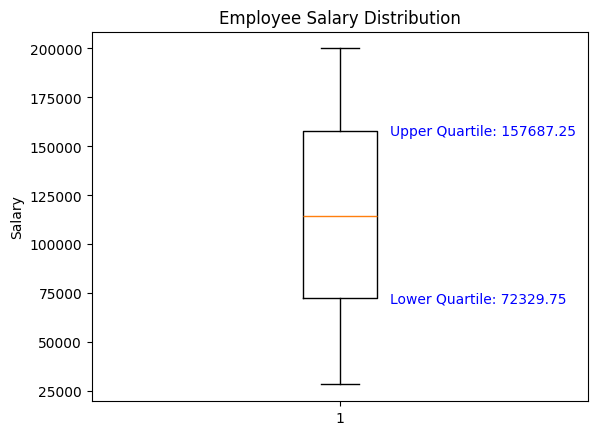

In [51]:
plt.figure()
plt.boxplot(df['Monthly_Salary'])
plt.title("Employee Salary Distribution")
plt.ylabel("Salary")

lower_quartile = np.percentile(df['Monthly_Salary'], 25)
upper_quartile = np.percentile(df['Monthly_Salary'], 75)

# Add text annotations for quartiles
plt.text(1.1, lower_quartile, f'Lower Quartile: {lower_quartile:.2f}', verticalalignment='center', color='blue', fontsize=10)
plt.text(1.1, upper_quartile, f'Upper Quartile: {upper_quartile:.2f}', verticalalignment='center', color='blue', fontsize=10)

plt.show()

<Figure size 640x480 with 0 Axes>

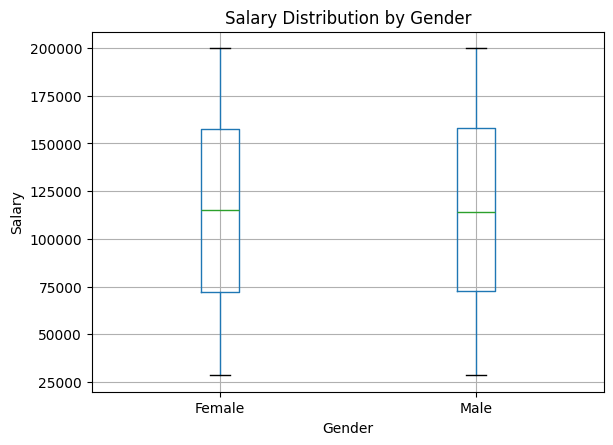

In [52]:
plt.figure()
df.boxplot(column='Monthly_Salary', by='Gender')
plt.title("Salary Distribution by Gender")
plt.suptitle("")
plt.ylabel("Salary")
plt.show()

In [53]:
df['Z_Score'] = stats.zscore(df['Monthly_Salary'])
df


,EmployeeID,Name,Department,Experience_Years,Education_Level,Age,Gender,City,Monthly_Salary,Z_Score
0,1,Employee_1,Marketing,15,Master,53,Female,Delhi,111416,-0.070598
1,2,Employee_2,Operations,7,Bachelor,25,Female,Bangalore,95271,-0.398212
2,3,Employee_3,IT,12,High School,51,Female,Hyderabad,69064,-0.930002
3,4,Employee_4,Operations,8,PhD,44,Male,Delhi,95091,-0.401864
4,5,Employee_5,Operations,15,Master,36,Female,Delhi,132450,0.356222
...,...,...,...,...,...,...,...,...,...,...
9995,9996,Employee_9996,IT,11,Bachelor,24,Female,Chennai,149931,0.710945
9996,9997,Employee_9997,IT,5,Bachelor,31,Male,Chennai,64358,-1.025496
9997,9998,Employee_9998,IT,19,High School,55,Female,Chennai,193005,1.584999
9998,9999,Employee_9999,Marketing,12,High School,31,Male,Bangalore,59326,-1.127605


In [54]:
outliers = df[np.abs(df['Z_Score']) >2 ]
outliers


,EmployeeID,Name,Department,Experience_Years,Education_Level,Age,Gender,City,Monthly_Salary,Z_Score


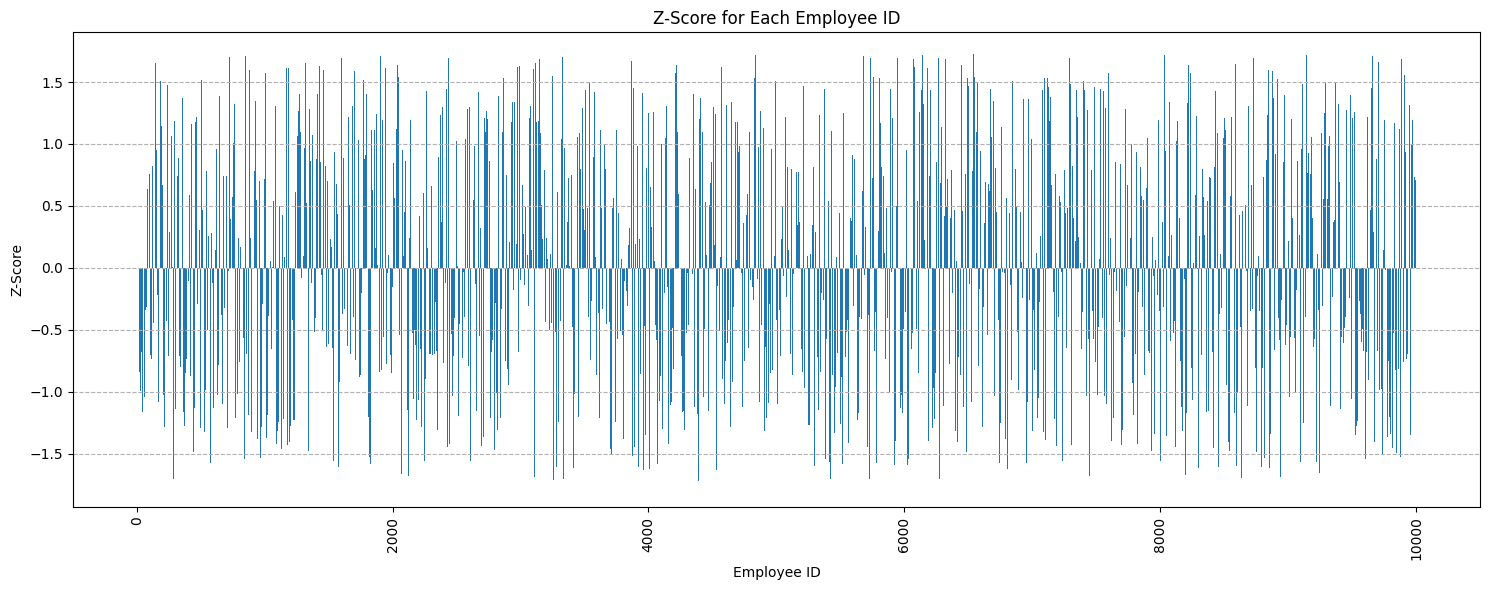

In [55]:
plt.figure(figsize=(15, 6))
plt.bar(df['EmployeeID'], df['Z_Score'])
plt.xlabel('Employee ID')
plt.ylabel('Z-Score')
plt.title('Z-Score for Each Employee ID')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

In [59]:
import gradio as gr

In [62]:
def employee_salary_ui(file):
    df = pd.read_csv(file.name)


    desc = df['Monthly_Salary'].describe().to_string()

    mean_salary = df['Monthly_Salary'].mean()
    median_salary = df['Monthly_Salary'].median()
    std_salary = df['Monthly_Salary'].std()

    stats_text = (
        f"Mean Salary: {mean_salary:.2f}\n"
        f"Median Salary: {median_salary:.2f}\n"
        f"Standard Deviation: {std_salary:.2f}"
    )


    gender_salary = df.groupby('Gender')['Monthly_Salary'].mean()
    pay_gap = ""
    if len(gender_salary) == 2:
        pay_gap = f"Pay Gap: {gender_salary.iloc[0] - gender_salary.iloc[1]:.2f}"


    plt.figure()
    plt.boxplot(df['Monthly_Salary'])
    plt.title("Employee Salary Distribution")
    plt.ylabel("Salary")

    lower_q = np.percentile(df['Monthly_Salary'], 25)
    upper_q = np.percentile(df['Monthly_Salary'], 75)
    plt.text(1.1, lower_q, f"Lower Q: {lower_q:.2f}", color="blue")
    plt.text(1.1, upper_q, f"Upper Q: {upper_q:.2f}", color="blue")

    plt.savefig("salary_distribution.png")
    plt.close()


    plt.figure()
    df.boxplot(column='Monthly_Salary', by='Gender')
    plt.title("Salary Distribution by Gender")
    plt.suptitle("")
    plt.ylabel("Salary")
    plt.savefig("salary_by_gender.png")
    plt.close()


    df['Z_Score'] = stats.zscore(df['Monthly_Salary'])
    outliers = df[np.abs(df['Z_Score']) > 2]

    conclusion = (
        "• Salary distribution analyzed using descriptive statistics\n"
        "• Gender-wise pay gap identified\n"
        "• Box plots visualized salary spread\n"
        "• Z-score method detected salary outliers."
    )

    return desc, stats_text, gender_salary.to_string(), pay_gap, \
           "salary_distribution.png", "salary_by_gender.png", outliers, conclusion

In [63]:
gr.Interface(
    fn=employee_salary_ui,
    inputs=gr.File(label="Upload Employee Salary CSV"),
    outputs=[
        gr.Textbox(label="Salary Description"),
        gr.Textbox(label="Statistical Measures"),
        gr.Textbox(label="Gender-wise Mean Salary"),
        gr.Textbox(label="Pay Gap"),
        gr.Image(label="Salary Distribution"),
        gr.Image(label="Salary Distribution by Gender"),
        gr.Dataframe(label="Detected Outliers"),
        gr.Textbox(label="Conclusion")
    ],
    title="Employee Salary Distribution System",
    description="Upload employee dataset to analyze salary distribution, pay gap, and salary outliers",
    theme="soft"
).launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://0261d9622993d6e8d8.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
print("Conclusion:")
print("• Salary distribution was analyzed using descriptive statistics.")
print("• Pay gaps were identified using group-wise mean comparison.")
print("• Box plots visualized salary spread and extreme values.")
print("• Z-score method detected salary outliers.")


Conclusion:
• Salary distribution was analyzed using descriptive statistics.
• Pay gaps were identified using group-wise mean comparison.
• Box plots visualized salary spread and extreme values.
• Z-score method detected salary outliers.
